In [1]:
from src.SupertypeTools import CGCalcMat, dist_heatmap, SSE, hierarchical_cluster, Silhouette, correlation, Tuning_N, crop_mtx, SSE, triangle2square
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]

B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]

C_order = [
    ['C01_02','C03_02','C07_02','C08_01','C08_02','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
    ]

BA_Mat_all = pd.read_csv("Computed_DistMtx/top10_matrix.csv", index_col=0)
BA_Mat_all = triangle2square(BA_Mat_all)

BA = crop_mtx(BA_Mat_all, A_order, flatten=True)
BB = crop_mtx(BA_Mat_all, B_order, flatten=True)
BC = crop_mtx(BA_Mat_all, C_order, flatten=True)


SSE_BA, _, _, _ = Tuning_N(crop_mtx(BA_Mat_all, A_order), 2, 6, None)
SSE_BB, _, _, _ = Tuning_N(crop_mtx(BA_Mat_all, B_order), 2, 6, None)
SSE_BC, _, _, _ = Tuning_N(crop_mtx(BA_Mat_all, C_order), 2, 6, None)

In [4]:
from sklearn.model_selection import ParameterGrid

SimMtx = "Grantham"
# Grantham, PMBEC, SM_THREAD_NORM
grid = ParameterGrid({'sigma':[0.075, 0.1, 0.2, 0.3, 0.5],
                    'k':[0.8,1,2,4,8,16]})


for param in grid:

    sigma=param['sigma']
    k=param['k']
    # print(sigma, k)

    # ======== HLA-A ===========
    AMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-A.list", sigma=sigma, k=k)
    AMat = triangle2square(AMat)

    # SA = crop_mtx(AMat, A_order, flatten=True)
    # RA = correlation(SA, BA, show_plot=False)[2]
    _, SSE_SA, _, _ = Tuning_N(AMat, 2, 12, BA_Mat_all)
    _, ASSE_BA3, _, _ = Tuning_N(AMat, 3, 3, BA_Mat_all)
    _, ASSE_BA6, _, _ = Tuning_N(AMat, 6, 6, BA_Mat_all)

    # ========= HLA-B ===========
    BMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-B.list", sigma=sigma,k=k)
    BMat = triangle2square(BMat)
    
    # SB = crop_mtx(BMat, B_order, flatten=True)
    # RB = correlation(SB, BB, show_plot=False)[2]
    _, SSE_SB, _, _ = Tuning_N(BMat, 2, 12, BA_Mat_all)
    _, BSSE_BA3, _, _ = Tuning_N(BMat, 3, 3, BA_Mat_all)
    _, BSSE_BA6, _, _ = Tuning_N(BMat, 6, 6, BA_Mat_all)

    # ========= HLA-C ===========
    CMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-C.list", sigma=sigma, k=k)
    CMat = triangle2square(CMat)
    
    # SC = crop_mtx(CMat, C_order, flatten=True)
    # RC = correlation(SC, BC, show_plot=False)[2]
    _, SSE_SC, _, _ = Tuning_N(CMat, 2, 12, BA_Mat_all)
    _, CSSE_BA, _, _ = Tuning_N(CMat, 2, 2, BA_Mat_all)

    
    # print(sum(np.array(SSE_SA) - np.array(SSE_BA)), sum(np.array(SSE_SB) - np.array(SSE_BB)), sum(np.array(SSE_SC) - np.array(SSE_BC)))
    print(sum(SSE_SA), sum(SSE_SB), sum(SSE_SC))
    print(ASSE_BA3, ASSE_BA6, BSSE_BA3, BSSE_BA6, CSSE_BA)
    # print(RA, RB, RC, sum([RA, RB, RC]))

# Doytchinova SSE:

# Sidney SSE:

#6.16953559 3.6466475399999996 16.219613250000002 7.081748650000001 1.9410084

53.97572135 123.24345731000003 9.2443332
[7.824182789999999] [4.65721159] [14.628007010000001] [11.676415409999999] [1.4584712]
48.23800817 116.98094047000001 9.2443332
[6.56411499] [4.994893429999999] [16.051428230000003] [11.63489335] [1.4584712]
44.41367341 96.44981019999999 8.989114400000002
[6.946807389999999] [4.24355495] [14.52374159] [9.14756415] [1.8297482000000003]
42.382780839999995 89.68345551000002 8.769281359999999
[6.050912309999999] [3.685817149999999] [12.66916741] [8.90843106] [1.8297482000000003]
39.29441648 101.92678403 9.22204852
[7.177871589999999] [2.86673759] [15.276085810000001] [9.709129010000002] [1.5950856]
53.16816801000001 124.68577799 9.2443332
[7.530967190000001] [4.65721159] [14.628007010000001] [11.676415409999999] [1.4584712]
47.99926685 115.66220017 9.14857952
[6.809950389999999] [4.99489343] [16.051428230000003] [11.63489335] [1.4584712]
41.20350849 100.53105532000001 8.989114400000002
[5.9496730300000005] [3.72006055] [15.386445830000003] [10.02725

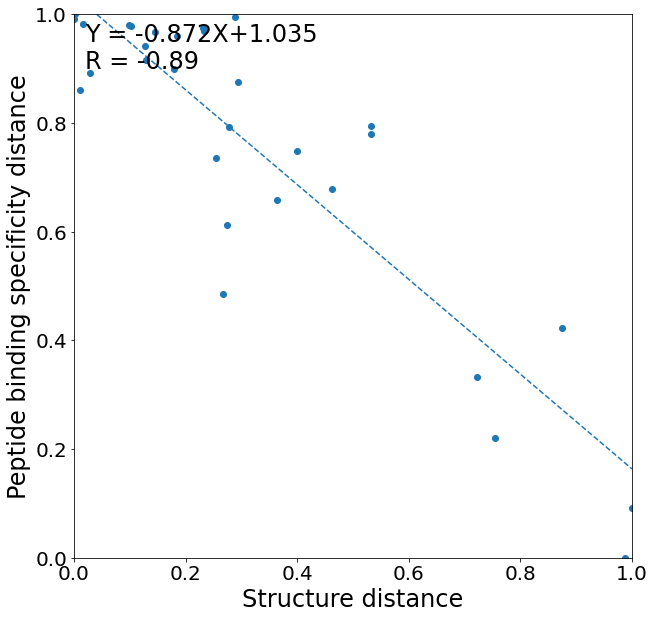

(-0.8717945974383523, 1.0353170421702098, -0.8902422869405534)

In [5]:
R_sum = [1.869900567,1.958653026,2.188140995,2.26215455,2.268915632,1.906688892,2.003320619,2.221358797,2.271166259,2.258267781,2.039391262,2.142459082,2.267840859,2.261010043,2.214926558,2.169933296,2.237607164,2.259110634,2.22758692,2.16481566,2.247476689,2.264165035,2.230790006,2.182574662,2.115252717,2.263258837,2.254730751,2.188530179,2.134087572,2.064572469]
SSE_sum = [186.4635119,174.4632818,149.852598,140.8355177,150.443249,187.0982792,172.8100465,150.7236782,135.5912073,143.010264,180.6455896,159.3904755,135.5220673,147.4363915,136.1181494,156.1752193,142.1978335,147.5513359,137.0076788,148.6120482,142.0606157,136.3897504,144.7618438,162.9905859,149.6631393,140.5838211,145.0533368,162.9905859,154.3195354,149.3443122]

correlation(SSE_sum, R_sum)

In [19]:
from sklearn.linear_model import LinearRegression
AMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx="Grantham", AlleleListFile="Dataset_split/ReferencePanel-A.list", sigma=0.1, k=4)

SMat = crop_mtx(AMat, A_order, flatten=True).reshape(-1, 1)
BMat = crop_mtx(BA_Mat_all, A_order, flatten=True).reshape(-1, 1)

xx = (SMat - np.min(SMat)) / (np.max(SMat) - np.min(SMat))
yy = (BMat - np.min(BMat)) / (np.max(BMat) - np.min(BMat))
rgs = LinearRegression(fit_intercept=False)
rgs.fit(xx, yy)
print(rgs.coef_, rgs.score(xx, yy))

[[1.11855796]] 0.5155376384966536


[0.49007145 0.71552148]
[0.2988841  0.15297385]
[0.38623338 0.68719697]
[0.2988841  0.15297385]
[0.76697295 0.79105351]
[0.47152658 0.71132661]
[0.2988841  0.15297385]
[0.76697295 0.79105351]
[0.17909276 0.62859641]
[0.2988841  0.15297385]
[0.17909276 0.62859641]
[0.76697295 0.79105351]
[0.40555797 0.63417567]
[0.54574126 0.79812142]
[0.76697295 0.79105351]
[0.17909276 0.62859641]
[0.38423352 0.16205306]
[0.40555797 0.63417567]
[0.54574126 0.79812142]
[0.202866   0.14275974]
[0.17909276 0.62859641]
[0.40555797 0.63417567]
[0.38423352 0.16205306]
[0.73586406 0.86761241]
[0.54574126 0.79812142]
[0.202866   0.14275974]
[0.81585835 0.67074666]


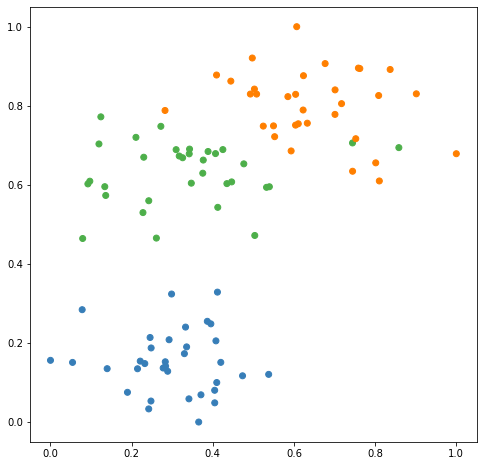

In [50]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering

colors = np.array(["#377eb8","#ff7f00","#4daf4a","#f781bf","#a65628","#984ea3","#999999","#e41a1c","#dede00"])

blobs = datasets.make_blobs(n_samples=100, n_features=2, random_state=2)
X = MinMaxScaler().fit_transform(blobs[0])




DistMat = pd.DataFrame(cdist(X, X))

original_SSE = []
SV = []
SVM = []

xx = list(range(2, 8))
# print(DistMat)
for i in xx:
    clustering = AgglomerativeClustering(n_clusters=i).fit(X)

    groups = []
    for group in pd.DataFrame(clustering.labels_).groupby(0):
        groups.append(group[1].index.to_list())

    for group in groups:
        members = X[group]
        center = X[group].mean(axis=0)
        print(center)
        dist = np.linalg.norm(members-center)
        # print(DistMat.iloc[group, group])

    


plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], color = colors[blobs[1]])

# a = np.random.normal((0, 0), (1, 1), (10,2))
# b = np.random.normal((1, 2), (1, 1), (10,2))
# c = np.random.normal((2, 0), (1, 1), (10,2))
# np.vstack((a, b, c))